# Goat Exploration

In this analysis, we are going to preprocess the data by combining two datasets. Each dataset contains valuable information, but both have missing values in different areas. By merging the two, we can leverage the strengths of each dataset, filling in gaps and ensuring we have a more complete and comprehensive set of data for our analysis. This approach allows us to mitigate the impact of missing values and create a more robust dataset that complements well across different time periods and data points.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Read csv files into dataframes

In [187]:
data_folder = "data/"
matches = "atp_2000_17/"
rankings = "atp_rankings/"

atp1 = pd.read_csv(data_folder + matches + "atp_matches_2000.csv")
atp2 = pd.read_csv(data_folder + matches + "atp_matches_2001.csv")
atp3 = pd.read_csv(data_folder + matches + "atp_matches_2002.csv")
atp4 = pd.read_csv(data_folder + matches + "atp_matches_2003.csv")
atp5 = pd.read_csv(data_folder + matches + "atp_matches_2004.csv")
atp6 = pd.read_csv(data_folder + matches + "atp_matches_2005.csv")
atp7 = pd.read_csv(data_folder + matches + "atp_matches_2006.csv")
atp8 = pd.read_csv(data_folder + matches + "atp_matches_2007.csv")
atp9 = pd.read_csv(data_folder + matches + "atp_matches_2008.csv")
atp10 = pd.read_csv(data_folder + matches + "atp_matches_2009.csv")
atp11 = pd.read_csv(data_folder + matches + "atp_matches_2010.csv")
atp12 = pd.read_csv(data_folder + matches + "atp_matches_2011.csv")
atp13 = pd.read_csv(data_folder + matches + "atp_matches_2012.csv")
atp14 = pd.read_csv(data_folder + matches + "atp_matches_2013.csv")
atp15 = pd.read_csv(data_folder + matches + "atp_matches_2014.csv")
atp16 = pd.read_csv(data_folder + matches + "atp_matches_2015.csv")
atp17 = pd.read_csv(data_folder + matches + "cleaned_atp_matches_2016.csv")

atp19 = pd.read_csv(data_folder + rankings + "atp_matches_till_2022.csv")
atp20 = pd.read_csv(data_folder + rankings + "atp_matches_till_2022.csv")

# filter years for last two
atp19 = atp19[atp19['tourney_id'].str[:4].isin(['2017', '2018', '2019'])]
atp20 = atp20[atp20['tourney_id'].str[:4].isin(['1998', '1999'])]

In [185]:
with open(data_folder + matches + "atp_matches_2016.csv", "r") as infile, open(data_folder + matches + "cleaned_atp_matches_2016.csv", "w") as outfile:
    for line in infile:
        cleaned = line.rstrip(',\n') + "\n"
        outfile.write(cleaned)


In [186]:
pd.read_csv(data_folder + matches + "cleaned_atp_matches_2016.csv")

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,...,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,...,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,...,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,...,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,...,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,2016-M-DC-2016-WG-PO-KAZ-RUS-01,Davis Cup WG PO: KAZ vs RUS,Hard,4,D,20160916,4,105723,NaN,NaN,...,1.0,2.0,2.0,87.0,60.0,34.0,8.0,11.0,7.0,13.0
2937,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,1,104797,NaN,NaN,...,1.0,4.0,3.0,88.0,53.0,35.0,14.0,13.0,4.0,8.0
2938,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,2,105967,NaN,NaN,...,3.0,3.0,1.0,107.0,73.0,36.0,18.0,12.0,10.0,16.0
2939,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,4,104797,NaN,NaN,...,8.0,3.0,6.0,169.0,103.0,70.0,34.0,24.0,2.0,7.0


Combine data into one big dataframe

In [188]:
atp = pd.concat([atp1, atp2, atp3, atp4, atp5, atp6, atp7, atp8, atp9, atp10, atp11, atp12, atp13, atp14, atp15, atp16, atp17, atp19, atp20])

In [189]:
# Extract year from the 'tourney_id' column and create a 'year' column
atp['year'] = atp['tourney_id'].str[:4]
atp = atp.sort_values(by='year')

# Filter the data for the three GOAT candidates
atp_goats = atp[(atp['winner_name'].isin(["Roger Federer", "Novak Djokovic", "Rafael Nadal"])) |
                (atp['loser_name'].isin(["Roger Federer", "Novak Djokovic", "Rafael Nadal"]))]

# Convert the 'tourney_date' column to datetime format
atp_goats['tourney_date'] = pd.to_datetime(atp_goats['tourney_date'], errors='coerce')

# Optionally, drop any rows with missing values
atp_goats = atp_goats.dropna(subset=['tourney_date'])

/var/folders/xk/r2z0cjlx76x3d1cbccmvznb80000gn/T/ipykernel_44967/2525749873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atp_goats['tourney_date'] = pd.to_datetime(atp_goats['tourney_date'], errors='coerce')


In [190]:
atp_goats.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
114422,1998-314,Gstaad,Clay,32,A,1970-01-01 00:00:00.019980706,2,102463,NaN,LL,...,1.0,3.0,74.0,36.0,24.0,15.0,10.0,1.0,5.0,1998
115478,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,14,103819,NaN,Q,...,0.0,0.0,65.0,36.0,22.0,11.0,8.0,4.0,8.0,1998
115487,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,23,103819,NaN,Q,...,9.0,4.0,75.0,39.0,30.0,16.0,9.0,8.0,10.0,1998
115500,1998-328,Basel,Hard,32,A,1970-01-01 00:00:00.019981005,5,101736,4.0,NaN,...,4.0,2.0,53.0,31.0,20.0,7.0,8.0,4.0,8.0,1998
115492,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,28,101733,2.0,NaN,...,3.0,6.0,67.0,39.0,27.0,14.0,10.0,7.0,10.0,1998


## Who won the most titles ?

### Who performed best on each surface ?

In [6]:
atp_goats['winner_name'].value_counts()

winner_name
Roger Federer         1230
Rafael Nadal           947
Novak Djokovic         839
Andy Murray             27
Jo Wilfried Tsonga      17
                      ... 
Sjeng Schalken           1
Davide Sanguinetti       1
Felix Mantilla           1
Juan Monaco              1
Lucas Arnold Ker         1
Name: count, Length: 172, dtype: int64

In [7]:
atp_goats.surface.value_counts()

surface
Hard      2073
Clay       953
Grass      392
Carpet      90
Name: count, dtype: int64

In [8]:
atp_clay = atp_goats.loc[atp_goats.surface == 'Clay']
atp_hard = atp_goats.loc[atp_goats.surface == 'Hard']
atp_grass = atp_goats.loc[atp_goats.surface == 'Grass']
atp_carpet = atp_goats.loc[atp_goats.surface == 'Carpet']

In [9]:
# Federer, Nadal, and Djokovic wins on Clay
federer_clay_wins = atp_clay[atp_clay['winner_name'] == 'Roger Federer']
federer_clay_wins_count = federer_clay_wins['tourney_id'].nunique()

rafa_clay_wins = atp_clay[atp_clay['winner_name'] == 'Rafael Nadal']
rafa_clay_wins_count = rafa_clay_wins['tourney_id'].nunique()

djokovic_clay_wins = atp_clay[atp_clay['winner_name'] == 'Novak Djokovic']
djokovic_clay_wins_count = djokovic_clay_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Hard
federer_hard_wins = atp_hard[atp_hard['winner_name'] == 'Roger Federer']
federer_hard_wins_count = federer_hard_wins['tourney_id'].nunique()

rafa_hard_wins = atp_hard[atp_hard['winner_name'] == 'Rafael Nadal']
rafa_hard_wins_count = rafa_hard_wins['tourney_id'].nunique()

djokovic_hard_wins = atp_hard[atp_hard['winner_name'] == 'Novak Djokovic']
djokovic_hard_wins_count = djokovic_hard_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Grass
federer_grass_wins = atp_grass[atp_grass['winner_name'] == 'Roger Federer']
federer_grass_wins_count = federer_grass_wins['tourney_id'].nunique()

rafa_grass_wins = atp_grass[atp_grass['winner_name'] == 'Rafael Nadal']
rafa_grass_wins_count = rafa_grass_wins['tourney_id'].nunique()

djokovic_grass_wins = atp_grass[atp_grass['winner_name'] == 'Novak Djokovic']
djokovic_grass_wins_count = djokovic_grass_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Carpet
federer_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Roger Federer']
federer_carpet_wins_count = federer_carpet_wins['tourney_id'].nunique()

rafa_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Rafael Nadal']
rafa_carpet_wins_count = rafa_carpet_wins['tourney_id'].nunique()

djokovic_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Novak Djokovic']
djokovic_carpet_wins_count = djokovic_carpet_wins['tourney_id'].nunique()

In [10]:
# Data for the plots for each surface
data_clay = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_clay_wins_count, rafa_clay_wins_count, djokovic_clay_wins_count]
}

data_hard = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_hard_wins_count, rafa_hard_wins_count, djokovic_hard_wins_count]
}

data_grass = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_grass_wins_count, rafa_grass_wins_count, djokovic_grass_wins_count]
}

data_carpet = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_carpet_wins_count, rafa_carpet_wins_count, djokovic_carpet_wins_count]
}

df = pd.DataFrame(data_clay)
df_hard = pd.DataFrame(data_hard)
df_grass = pd.DataFrame(data_grass)
df_carpet = pd.DataFrame(data_carpet)

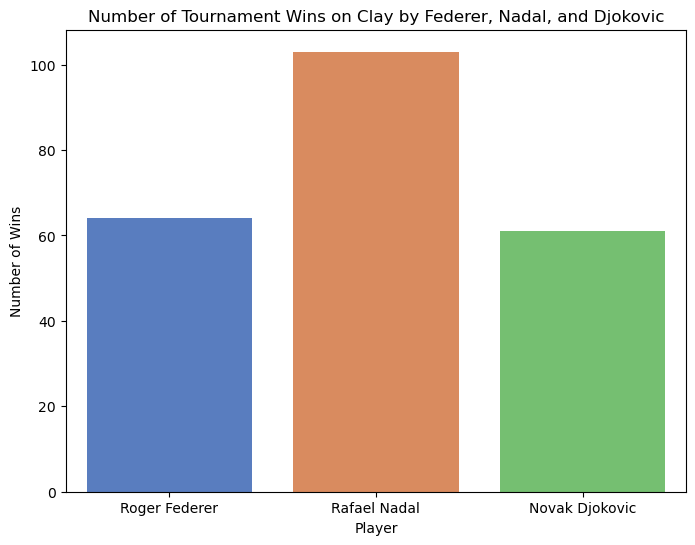

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df, hue='Player', palette='muted', legend=False)

plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Clay by Federer, Nadal, and Djokovic')

plt.show()

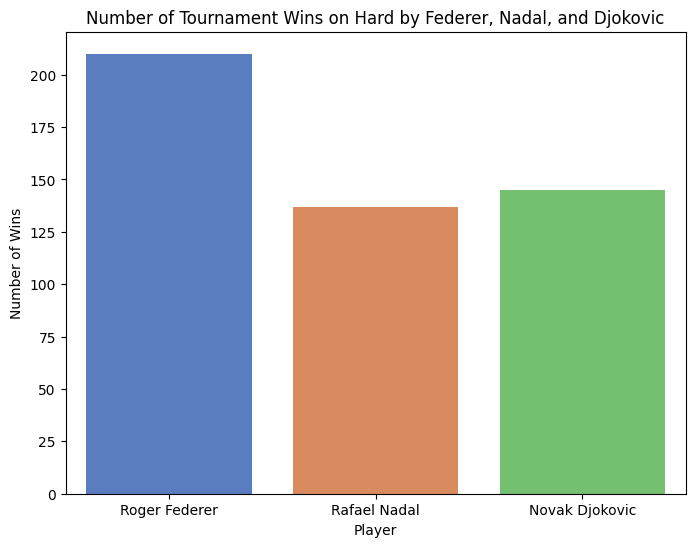

In [12]:
# Plot for Hard
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_hard, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Hard by Federer, Nadal, and Djokovic')
plt.show()

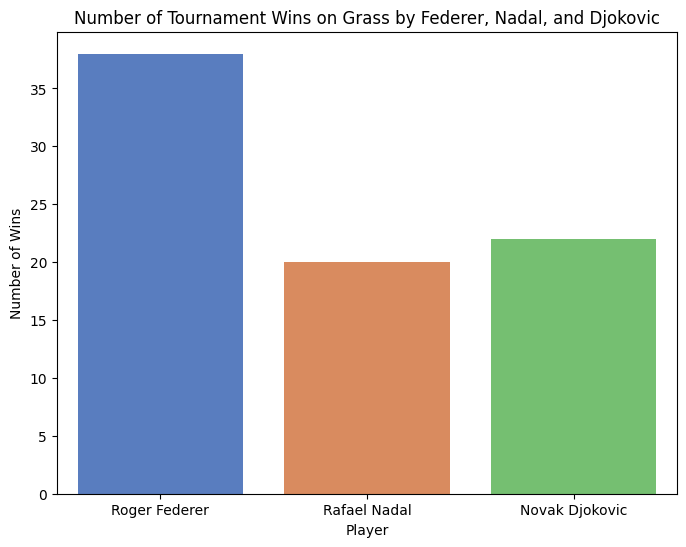

In [13]:
# Plot for Grass
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_grass, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Grass by Federer, Nadal, and Djokovic')
plt.show()

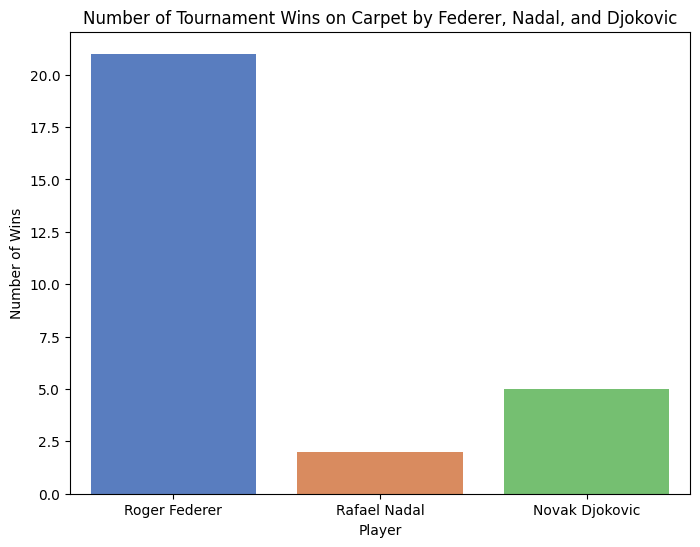

In [14]:
# Plot for Carpet
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_carpet, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Carpet by Federer, Nadal, and Djokovic')
plt.show()

### Who won the most Grand Slams ?

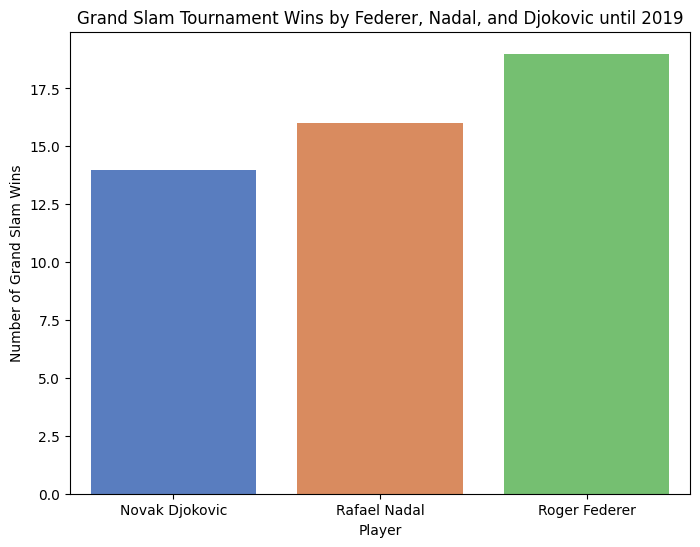

,Player,Grand Slam Wins
0,Novak Djokovic,14
1,Rafael Nadal,16
2,Roger Federer,19


In [ ]:
grand_slams = atp_goats[atp_goats['tourney_level'] == 'G']

grand_slams = grand_slams[['tourney_name', 'winner_name', 'year']]

# Fix the naming of the US Open
grand_slams['tourney_name'] = grand_slams['tourney_name'].replace("Us Open", "US Open")

# Count the number of wins for each player (Federer, Nadal, Djokovic)
wins_count = grand_slams[grand_slams['winner_name'].isin(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])]
wins_count = wins_count.groupby('winner_name')['year'].nunique().reset_index()

wins_count.columns = ['Player', 'Grand Slam Wins']

plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Grand Slam Wins', data=wins_count, hue='Player', palette='muted', legend=False)

plt.xlabel('Player')
plt.ylabel('Number of Grand Slam Wins')
plt.title('Grand Slam Tournament Wins by Federer, Nadal, and Djokovic until 2019')

plt.show()

wins_count

In [61]:
atp_goats[atp_goats['tourney_level'] == 'G'].year.value_counts()

year
2011    71
2010    70
2019    69
2008    69
2007    68
2014    63
2018    62
2015    62
2012    62
2009    62
2006    57
2013    57
2017    55
2005    50
2004    29
2003    21
2001    17
2000    11
2002    10
1999     2
Name: count, dtype: int64

In [62]:
grand_slams.head()

,tourney_name,winner_name,tourney_date
117832,Wimbledon,Jiri Novak,1970-01-01 00:00:00.019990621
117524,Roland Garros,Patrick Rafter,1970-01-01 00:00:00.019990524
2883,Roland Garros,Roger Federer,1970-01-01 00:00:00.020000529
2863,Roland Garros,Roger Federer,1970-01-01 00:00:00.020000529
2893,Roland Garros,Alex Corretja,1970-01-01 00:00:00.020000529


## Overall Match Won

### Win Ratio Overall

In [17]:
atp.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
115853,1998-352,Paris Masters,Carpet,48,M,19981102.0,32.0,102701,2.0,NaN,...,2.0,4.0,56.0,31.0,22.0,8.0,8.0,5.0,9.0,1998
114778,1998-439,Umag,Clay,32,A,19980727.0,20.0,102796,6.0,NaN,...,0.0,1.0,106.0,74.0,33.0,17.0,14.0,9.0,17.0,1998
114779,1998-439,Umag,Clay,32,A,19980727.0,21.0,103264,NaN,NaN,...,6.0,2.0,87.0,57.0,43.0,13.0,15.0,1.0,5.0,1998
114780,1998-439,Umag,Clay,32,A,19980727.0,22.0,102856,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
114781,1998-439,Umag,Clay,32,A,19980727.0,23.0,102539,7.0,NaN,...,5.0,2.0,107.0,73.0,43.0,18.0,15.0,3.0,8.0,1998


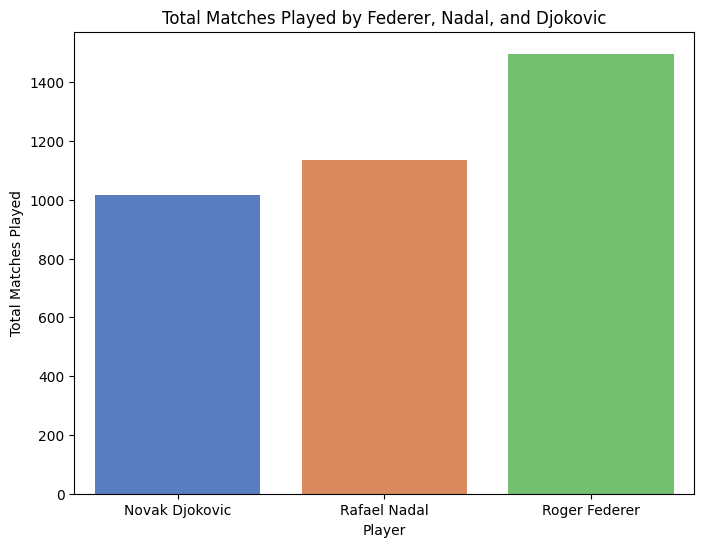

,Player,Total Matches
0,Novak Djokovic,1018
1,Rafael Nadal,1135
2,Roger Federer,1497


In [ ]:
goats = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']

# Count matches where each GOAT was the winner
winner_counts = atp_goats[atp_goats['winner_name'].isin(goats)].groupby('winner_name').size()

# Count matches where each GOAT was the loser
loser_counts = atp_goats[atp_goats['loser_name'].isin(goats)].groupby('loser_name').size()

# Combine the two counts to get the total matches played
total_matches = winner_counts.add(loser_counts, fill_value=0).reset_index()
total_matches.columns = ['Player', 'Total Matches']

plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Total Matches', data=total_matches, hue='Player', palette='muted', legend=False)

plt.xlabel('Player')
plt.ylabel('Total Matches Played')
plt.title('Total Matches Played by Federer, Nadal, and Djokovic')

plt.show()

total_matches

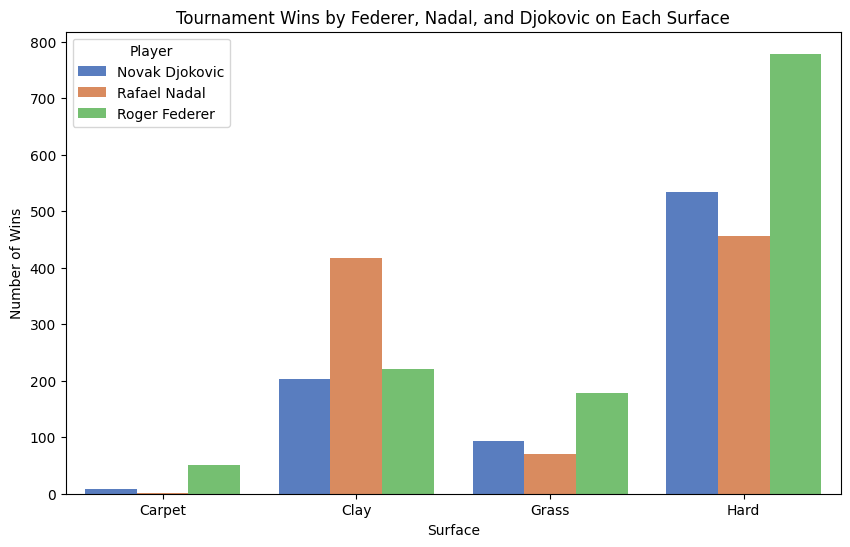

In [ ]:
goat_wins = atp_goats[atp_goats['winner_name'].isin(goats)]

# Count wins by surface and player
surface_wins = goat_wins.groupby(['surface', 'winner_name']).size().reset_index(name='Wins')

plt.figure(figsize=(10, 6))
sns.barplot(x='surface', y='Wins', hue='winner_name', data=surface_wins, palette='muted')

plt.xlabel('Surface')
plt.ylabel('Number of Wins')
plt.title('Tournament Wins by Federer, Nadal, and Djokovic on Each Surface')
plt.legend(title='Player')

plt.show()

### Win Ratio in Slams

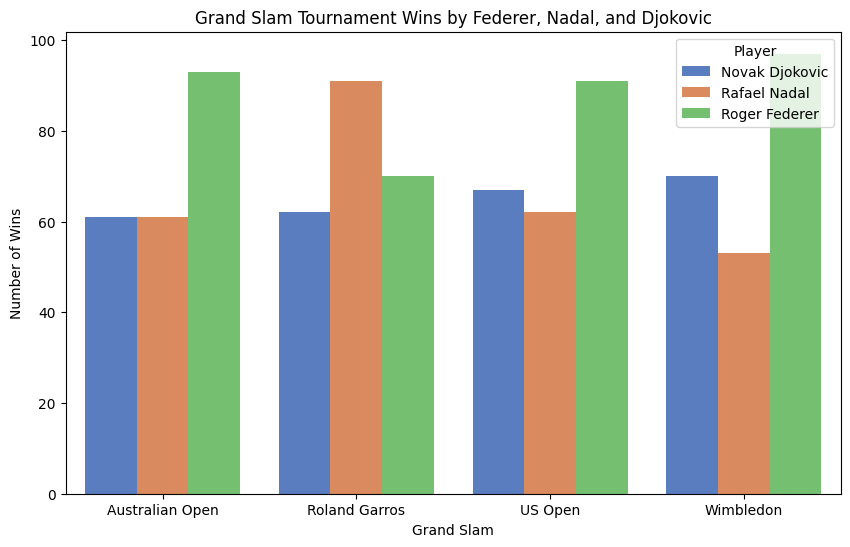

In [ ]:
grand_slam_names = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open']

grand_slam_wins = atp_goats[(atp_goats['winner_name'].isin(goats)) & 
                             (atp_goats['tourney_name'].isin(grand_slam_names))]

# Count wins by tournament and player
gs_wins = grand_slam_wins.groupby(['tourney_name', 'winner_name']).size().reset_index(name='Wins')

plt.figure(figsize=(10, 6))
sns.barplot(x='tourney_name', y='Wins', hue='winner_name', data=gs_wins, palette='muted')

plt.xlabel('Grand Slam')
plt.ylabel('Number of Wins')
plt.title('Grand Slam Tournament Wins by Federer, Nadal, and Djokovic')
plt.legend(title='Player')

plt.show()

## Winnning frequency over time

### On tour in general

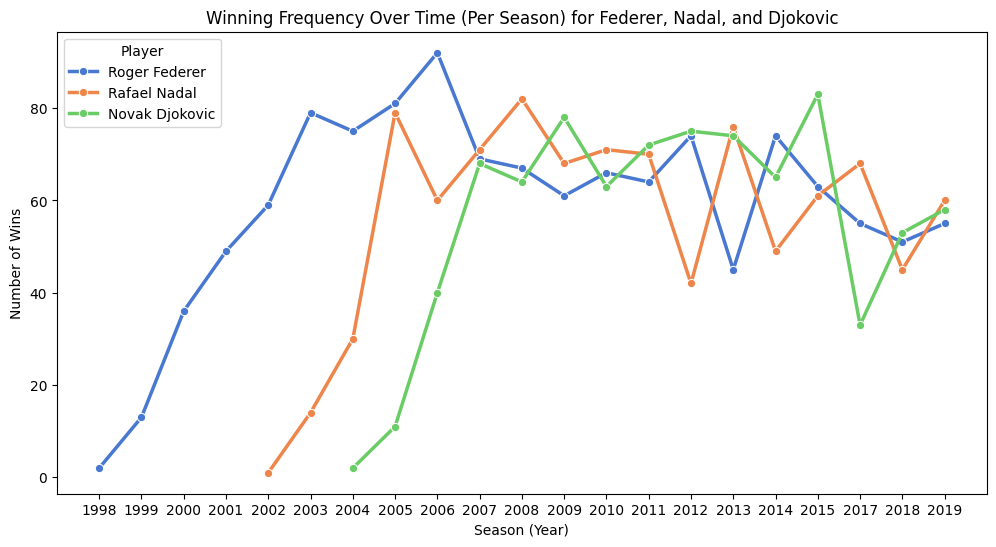

In [ ]:
goat_wins = atp_goats[atp_goats['winner_name'].isin(goats)]

wins_per_year = goat_wins.groupby(['year', 'winner_name']).size().reset_index(name='Wins')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Wins', hue='winner_name', data=wins_per_year, marker='o', linewidth=2.5, palette='muted')

plt.xlabel('Season (Year)')
plt.ylabel('Number of Wins')
plt.title('Winning Frequency Over Time (Per Season) for Federer, Nadal, and Djokovic')
plt.legend(title='Player')

plt.show()

### In Grand Slams

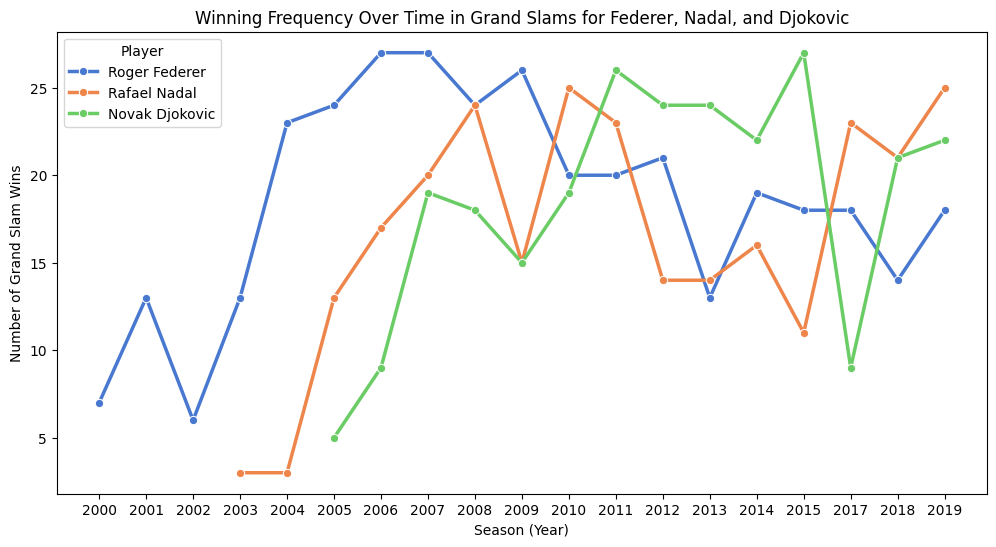

In [ ]:
grand_slam_wins = atp_goats[(atp_goats['winner_name'].isin(goats)) & (atp_goats['tourney_level'] == 'G')]

slam_wins_per_year = grand_slam_wins.groupby(['year', 'winner_name']).size().reset_index(name='Wins')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Wins', hue='winner_name', data=slam_wins_per_year, marker='o', linewidth=2.5, palette='muted')

plt.xlabel('Season (Year)')
plt.ylabel('Number of Grand Slam Wins')
plt.title('Winning Frequency Over Time in Grand Slams for Federer, Nadal, and Djokovic')
plt.legend(title='Player')

plt.show()

## Fifth Set Performance

In the world of professional tennis, few challenges test a player’s skill, endurance, and mental fortitude quite like a five-set match. These marathon battles, often lasting 4 to 5 hours or more, push players to their absolute limits, both physically and psychologically. Unlike shorter matches, five-setters demand not only peak athletic performance but also incredible resilience, strategic adaptability, and the ability to handle pressure in the most critical moments.

For this reason, five-set matches are often seen as the ultimate measure of greatness. The ability to consistently win these grueling encounters separates the best from the rest, highlighting who truly thrives under the toughest conditions. When evaluating the GOAT (Greatest of All Time) in tennis, examining performance in five-set matches offers valuable insight into a player’s dominance, clutch factor, and legacy on the biggest stages of the sport.

**Think to measure win ratio not just COUNT !!!**

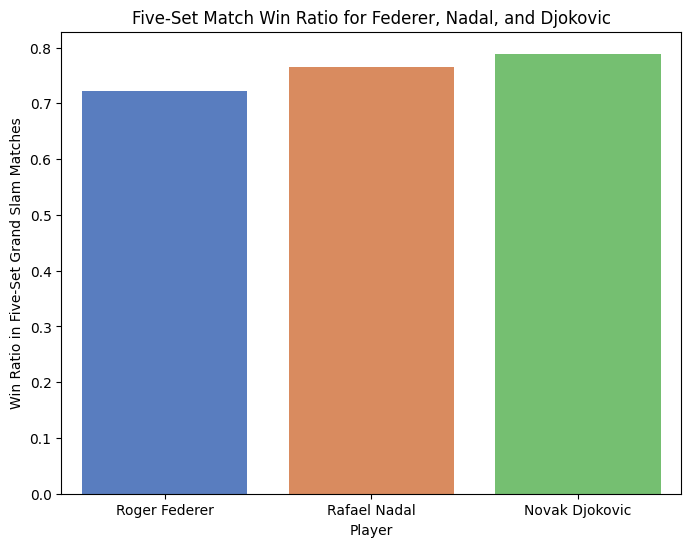

In [ ]:
grand_slam_matches = atp_goats[atp_goats['tourney_level'] == 'G']

five_set_matches = grand_slam_matches[grand_slam_matches['score'].str.count('-') >= 4]

# Calculate total five-set matches and wins for each GOAT
goats = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
win_ratios = {}

for goat in goats:
    total_five_set_matches = len(five_set_matches[(five_set_matches['winner_name'] == goat) | 
                                                  (five_set_matches['loser_name'] == goat)])
    five_set_wins = len(five_set_matches[five_set_matches['winner_name'] == goat])
    
    if total_five_set_matches > 0:
        win_ratios[goat] = five_set_wins / total_five_set_matches
    else:
        win_ratios[goat] = 0

df = pd.DataFrame(list(win_ratios.items()), columns=['Player', 'Win Ratio'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Win Ratio', data=df, hue='Player', palette='muted', legend=False)

plt.xlabel('Player')
plt.ylabel('Win Ratio in Five-Set Grand Slam Matches')
plt.title('Five-Set Match Win Ratio for Federer, Nadal, and Djokovic')

plt.show()

## Head to Head

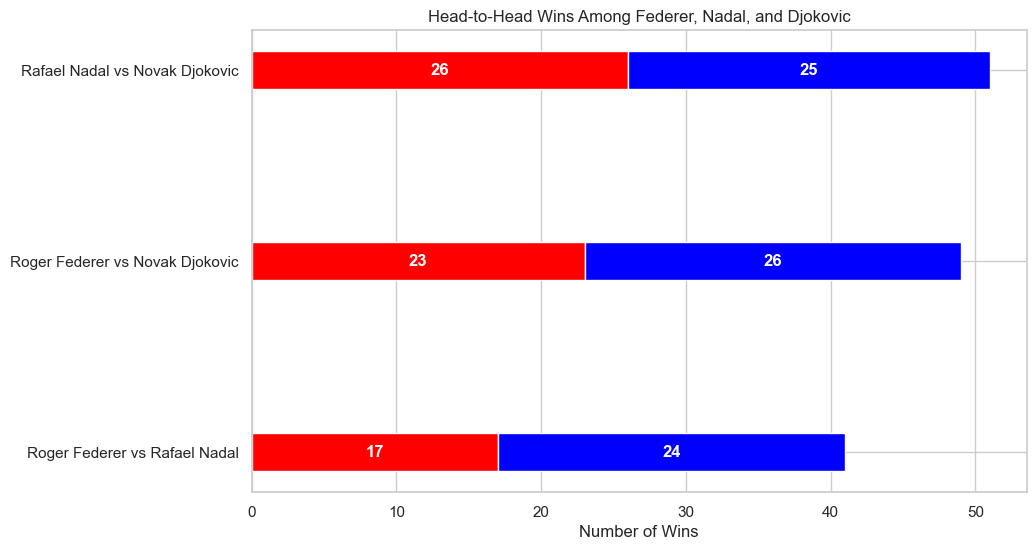

In [ ]:
matchups = [("Roger Federer", "Rafael Nadal"), 
            ("Roger Federer", "Novak Djokovic"), 
            ("Rafael Nadal", "Novak Djokovic")]

h2h_results = []
for player1, player2 in matchups:
    wins_p1 = len(atp_goats[(atp_goats['winner_name'] == player1) & (atp_goats['loser_name'] == player2)])
    wins_p2 = len(atp_goats[(atp_goats['winner_name'] == player2) & (atp_goats['loser_name'] == player1)])
    h2h_results.append((player1, player2, wins_p1, wins_p2))

df = pd.DataFrame(h2h_results, columns=["Player1", "Player2", "Wins_Player1", "Wins_Player2"])

# Reshape data for seaborn
df_melted = df.melt(id_vars=["Player1", "Player2"], 
                     value_vars=["Wins_Player1", "Wins_Player2"], 
                     var_name="Winner", value_name="Wins")

# Map colors to players
df_melted["Color"] = df_melted["Winner"].map({"Wins_Player1": "red", "Wins_Player2": "blue"})

plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    plt.barh(i, row["Wins_Player1"], color="red", label=row["Player1"] if i == 0 else "", height=0.2)
    plt.barh(i, row["Wins_Player2"], left=row["Wins_Player1"], color="blue", label=row["Player2"] if i == 0 else "", height=0.2)

    # Annotate win numbers
    plt.text(row["Wins_Player1"] / 2, i, str(row["Wins_Player1"]), va="center", ha="center", color="white", fontsize=12, fontweight="bold")
    plt.text(row["Wins_Player1"] + (row["Wins_Player2"] / 2), i, str(row["Wins_Player2"]), va="center", ha="center", color="white", fontsize=12, fontweight="bold")

plt.yticks(range(len(df)), [f"{p1} vs {p2}" for p1, p2 in zip(df["Player1"], df["Player2"])])
plt.xlabel("Number of Wins")
plt.title("Head-to-Head Wins Among Federer, Nadal, and Djokovic")

plt.show()

## Rankings

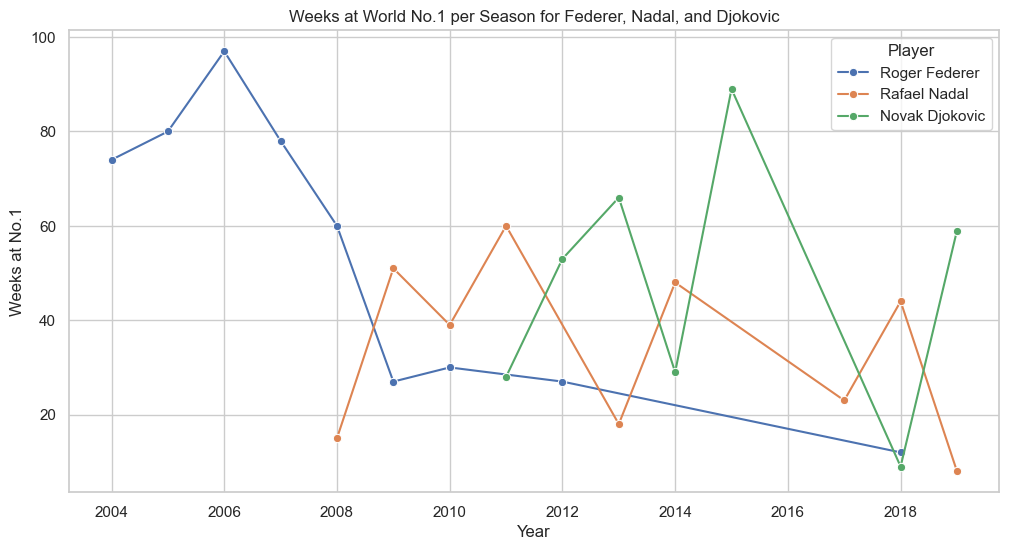

In [ ]:
goats = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
goat_matches = atp[atp['winner_name'].isin(goats) | atp['loser_name'].isin(goats)]

goat_rankings = []
for index, row in goat_matches.iterrows():
    for player in goats:
        if row['winner_name'] == player:
            goat_rankings.append({'player': player, 'date': row['tourney_date'], 'rank': row['winner_rank']})
        if row['loser_name'] == player:
            goat_rankings.append({'player': player, 'date': row['tourney_date'], 'rank': row['loser_rank']})

rankings_df = pd.DataFrame(goat_rankings)
rankings_df.dropna(inplace=True)  # Remove missing rankings
rankings_df['date'] = pd.to_datetime(rankings_df['date'], format='%Y%m%d')
rankings_df['year'] = rankings_df['date'].dt.year

# Filter for weeks at No.1 (rank = 1)
no1_weeks = rankings_df[rankings_df['rank'] == 1]

# Count No.1 weeks per season
no1_weeks_per_season = no1_weeks.groupby(['year', 'player']).size().reset_index(name='weeks_at_no1')

plt.figure(figsize=(12, 6))
sns.lineplot(data=no1_weeks_per_season, x='year', y='weeks_at_no1', hue='player', marker='o')
plt.xlabel('Year')
plt.ylabel('Weeks at No.1')
plt.title('Weeks at World No.1 per Season for Federer, Nadal, and Djokovic')
plt.legend(title='Player')
plt.grid(True)
plt.show()

## Score Computation By Year

### Setup

In [191]:
atp = atp.dropna(subset=['year'])

In [192]:
atp = atp[pd.to_numeric(atp['year'], errors='coerce').notna()]

In [193]:
atp.year.value_counts()

year
1998    3591
2000    3364
1999    3334
2001    3307
2004    3277
2005    3257
2006    3257
2002    3236
2003    3214
2007    3152
2008    3110
2009    3074
2010    3058
2011    3030
2012    3025
2013    2959
2015    2958
2016    2941
2017    2911
2014    2901
2018    2897
2019    2806
Name: count, dtype: int64

In [194]:
players = set(atp.winner_name).union(set(atp.loser_name))

In [195]:
len(players)

2501

In [196]:
len(atp)

68659

### Weeks at #1

In [197]:
import pandas as pd

# Load all ranking data
df_00s = pd.read_csv('data/huge_dataset/tennis_atp/atp_rankings_00s.csv')
df_10s = pd.read_csv('data/huge_dataset/tennis_atp/atp_rankings_10s.csv')
df_20s = pd.read_csv('data/huge_dataset/tennis_atp/atp_rankings_20s.csv')

# Combine into one DataFrame
rankings = pd.concat([df_00s, df_10s, df_20s], ignore_index=True)


In [198]:
rankings

,ranking_date,rank,player,points
0,20000110,1,101736,4135.0
1,20000110,2,102338,2915.0
2,20000110,3,101948,2419.0
3,20000110,4,103017,2184.0
4,20000110,5,102856,2169.0
...,...,...,...,...
2169462,20231225,2048,131888,1.0
2169463,20231225,2048,210236,1.0
2169464,20231225,2048,210649,1.0
2169465,20231225,2052,206385,1.0


In [199]:
no1_rankings = rankings[rankings['rank'] == 1].copy()

no1_rankings['ranking_date'] = pd.to_datetime(no1_rankings['ranking_date'], format='%Y%m%d')
no1_rankings['year'] = no1_rankings['ranking_date'].dt.year

no1_rankings = no1_rankings[(no1_rankings['year'] >= 2000) & (no1_rankings['year'] <= 2022)]

weeks_at_no1 = (
    no1_rankings
    .groupby(['year', 'player'])
    .size()
    .reset_index(name='weeks_at_no1')
)

players = pd.read_csv('data/huge_dataset/tennis_atp/atp_players.csv')

weeks_at_no1 = weeks_at_no1.rename(columns={'player': 'player_id'})

# Merge player names
weeks_at_no1 = weeks_at_no1.merge(players[['player_id', 'name_first', 'name_last']], on='player_id', how='left')

weeks_at_no1['player_name'] = weeks_at_no1['name_first'] + ' ' + weeks_at_no1['name_last']
weeks_at_no1.drop(columns=['name_first', 'name_last', 'player_id'], inplace=True)

In [200]:
weeks_at_no1['score'] = weeks_at_no1['weeks_at_no1'] / 52

In [201]:
weeks_at_no1

,year,weeks_at_no1,player_name,score
0,2000,35,Andre Agassi,0.673077
1,2000,10,Pete Sampras,0.192308
2,2000,4,Gustavo Kuerten,0.076923
3,2000,2,Marat Safin,0.038462
4,2001,39,Gustavo Kuerten,0.750000
5,2001,7,Marat Safin,0.134615
6,2001,7,Lleyton Hewitt,0.134615
7,2002,52,Lleyton Hewitt,1.000000
8,2003,14,Andre Agassi,0.269231
9,2003,8,Juan Carlos Ferrero,0.153846


### Win Ratio

In [202]:
atp.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
115853,1998-352,Paris Masters,Carpet,48,M,19981102,32,102701,2.0,NaN,...,2.0,4.0,56.0,31.0,22.0,8.0,8.0,5.0,9.0,1998
114778,1998-439,Umag,Clay,32,A,19980727,20,102796,6.0,NaN,...,0.0,1.0,106.0,74.0,33.0,17.0,14.0,9.0,17.0,1998
114779,1998-439,Umag,Clay,32,A,19980727,21,103264,NaN,NaN,...,6.0,2.0,87.0,57.0,43.0,13.0,15.0,1.0,5.0,1998
114780,1998-439,Umag,Clay,32,A,19980727,22,102856,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
114781,1998-439,Umag,Clay,32,A,19980727,23,102539,7.0,NaN,...,5.0,2.0,107.0,73.0,43.0,18.0,15.0,3.0,8.0,1998


In [203]:
wins_per_year = atp.groupby(['year', 'winner_name']).size().reset_index(name='Wins').rename(columns={'winner_name': 'name'})
loss_per_year = atp.groupby(['year', 'loser_name']).size().reset_index(name='Losses').rename(columns={'loser_name': 'name'})

In [204]:
total_per_year = wins_per_year.merge(loss_per_year, on=['year', 'name'], how='left')
total_per_year['win_ratio'] = total_per_year['Wins'] / (total_per_year['Wins'] + total_per_year['Losses'])

In [205]:
total_per_year.drop(columns=['Wins', 'Losses'], inplace=True)

In [206]:
total_per_year[total_per_year['name'] == 'Novak Djokovic']

,year,name,win_ratio
2229,2004,Novak Djokovic,0.400000
2562,2005,Novak Djokovic,0.500000
2898,2006,Novak Djokovic,0.689655
3234,2007,Novak Djokovic,0.781609
3571,2008,Novak Djokovic,0.790123
3897,2009,Novak Djokovic,0.804124
4202,2010,Novak Djokovic,0.777778
4523,2011,Novak Djokovic,0.911392
4827,2012,Novak Djokovic,0.862069
5131,2013,Novak Djokovic,0.891566


In [207]:
slam_wins_per_year = atp[atp['tourney_level'] == 'G'].groupby(['year', 'winner_name']).size().reset_index(name='Wins').rename(columns={'winner_name': 'name'})
slam_loss_per_year = atp[atp['tourney_level'] == 'G'].groupby(['year', 'loser_name']).size().reset_index(name='Losses').rename(columns={'loser_name': 'name'})

In [208]:
slam_total_per_year = slam_wins_per_year.merge(slam_loss_per_year, on=['year', 'name'], how='left')
slam_total_per_year['win_ratio'] = slam_total_per_year['Wins'] / (slam_total_per_year['Wins'] + slam_total_per_year['Losses'])
slam_total_per_year.drop(columns=['Wins', 'Losses'], inplace=True)

In [209]:
slam_total_per_year[slam_total_per_year['name'] == 'Novak Djokovic']

,year,name,win_ratio
1012,2005,Novak Djokovic,0.555556
1147,2006,Novak Djokovic,0.692308
1273,2007,Novak Djokovic,0.826087
1394,2008,Novak Djokovic,0.857143
1527,2009,Novak Djokovic,0.789474
1655,2010,Novak Djokovic,0.826087
1780,2011,Novak Djokovic,0.962963
1918,2012,Novak Djokovic,0.888889
2042,2013,Novak Djokovic,0.888889
2163,2014,Novak Djokovic,0.880000


### Slam Titles

In [210]:
grand_slam_names = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open']

slam_finals = atp[(atp['tourney_name'].isin(grand_slam_names)) & (atp['round'] == 'F')]
slam_titles = slam_finals[['year', 'winner_name']]
slam_wins_per_year = (
    slam_titles
    .groupby(['year', 'winner_name'])
    .size()
    .reset_index(name='slams_won')
    .sort_values(['year', 'slams_won'], ascending=[True, False])
)

In [211]:
slam_wins_per_year

,year,winner_name,slams_won
0,1998,Carlos Moya,1
1,1998,Patrick Rafter,1
2,1998,Pete Sampras,1
3,1998,Petr Korda,1
4,1999,Andre Agassi,2
...,...,...,...
59,2018,Novak Djokovic,2
60,2018,Rafael Nadal,1
61,2018,Roger Federer,1
62,2019,Novak Djokovic,2


### Fifth-Set performance

In [212]:
players

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554
...,...,...,...,...,...,...,...,...
65014,212913,Pietro,Ricci,U,NaN,ITA,NaN,NaN
65015,212914,Corey,Craig,U,NaN,USA,NaN,NaN
65016,212915,Aleksandar,Ljubojevic,U,NaN,SRB,NaN,NaN
65017,212916,Marko,Milosavljevic,U,NaN,SRB,NaN,NaN


In [213]:
# 1. Filter Grand Slam 5-set matches
grand_slam_matches = atp[atp['tourney_level'] == 'G']
five_set_matches = grand_slam_matches[grand_slam_matches['score'].str.count('-') >= 4]

# 2. Ensure date is datetime and add year column
five_set_matches['tourney_date'] = pd.to_datetime(five_set_matches['tourney_date'], format='%Y%m%d')
five_set_matches['year'] = five_set_matches['tourney_date'].dt.year

# 3. Calculate per-player per-year win ratios
records = []

for index, player in players.iterrows():
    print(f"{index} / {len(players)}")
    full_name = f"{player['name_first']} {player['name_last']}"
    
    # Get all 5-set matches involving the player
    player_matches = five_set_matches[
        (five_set_matches['winner_name'] == full_name) |
        (five_set_matches['loser_name'] == full_name)
    ]
    
    if player_matches.empty:
        continue

    # Group by year
    for year, group in player_matches.groupby('year'):
        total_matches = len(group)
        wins = len(group[group['winner_name'] == full_name])
        win_ratio = wins / total_matches if total_matches > 0 else 0
        records.append({'Player': full_name, 'Year': year, 'Five-Set Win Ratio': win_ratio})

# 4. Create DataFrame
five_set_ratio_by_year = pd.DataFrame(records)


/var/folders/xk/r2z0cjlx76x3d1cbccmvznb80000gn/T/ipykernel_44967/1770061552.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_set_matches['tourney_date'] = pd.to_datetime(five_set_matches['tourney_date'], format='%Y%m%d')
/var/folders/xk/r2z0cjlx76x3d1cbccmvznb80000gn/T/ipykernel_44967/1770061552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_set_matches['year'] = five_set_matches['tourney_date'].dt.year


0 / 65019
1 / 65019
2 / 65019
3 / 65019
4 / 65019
5 / 65019
6 / 65019
7 / 65019
8 / 65019
9 / 65019
10 / 65019
11 / 65019
12 / 65019
13 / 65019
14 / 65019
15 / 65019
16 / 65019
17 / 65019
18 / 65019
19 / 65019
20 / 65019
21 / 65019
22 / 65019
23 / 65019
24 / 65019
25 / 65019
26 / 65019
27 / 65019
28 / 65019
29 / 65019
30 / 65019
31 / 65019
32 / 65019
33 / 65019
34 / 65019
35 / 65019
36 / 65019
37 / 65019
38 / 65019
39 / 65019
40 / 65019
41 / 65019
42 / 65019
43 / 65019
44 / 65019
45 / 65019
46 / 65019
47 / 65019
48 / 65019
49 / 65019
50 / 65019
51 / 65019
52 / 65019
53 / 65019
54 / 65019
55 / 65019
56 / 65019
57 / 65019
58 / 65019
59 / 65019
60 / 65019
61 / 65019
62 / 65019
63 / 65019
64 / 65019
65 / 65019
66 / 65019
67 / 65019
68 / 65019
69 / 65019
70 / 65019
71 / 65019
72 / 65019
73 / 65019
74 / 65019
75 / 65019
76 / 65019
77 / 65019
78 / 65019
79 / 65019
80 / 65019
81 / 65019
82 / 65019
83 / 65019
84 / 65019
85 / 65019
86 / 65019
87 / 65019
88 / 65019
89 / 65019
90 / 65019
91 / 6501

In [214]:
slam_wins_per_year.rename(columns={'winner_name': 'name'}, inplace=True)

In [215]:
five_set_ratio_by_year.rename(columns={'Player': 'name'}, inplace=True)

In [216]:
weeks_at_no1.rename(columns={'player_name': 'name'}, inplace=True)

In [217]:
five_set_ratio_by_year.rename(columns={'Year': 'year'}, inplace=True)

In [218]:
slam_total_per_year.rename(columns={'win_ratio': 'slam_win_ratio'}, inplace=True)
total_per_year.rename(columns={'win_ratio': 'general_win_ratio'}, inplace=True)

In [219]:
slam_total_per_year.columns

Index(['year', 'name', 'slam_win_ratio'], dtype='object')

In [220]:
slam_wins_per_year.columns

Index(['year', 'name', 'slams_won'], dtype='object')

In [221]:
five_set_ratio_by_year.columns

Index(['name', 'year', 'Five-Set Win Ratio'], dtype='object')

In [222]:
total_per_year.columns

Index(['year', 'name', 'general_win_ratio'], dtype='object')

In [223]:
weeks_at_no1.columns

Index(['year', 'weeks_at_no1', 'name', 'score'], dtype='object')

In [224]:
# Grand-Slam Data

## Win-Ratio
slam_total_per_year

## Titles
slam_wins_per_year

## Fifth-Set Ratio
five_set_ratio_by_year


# Win-Ratio
total_per_year

# Weeks at n°1
weeks_at_no1

,year,weeks_at_no1,name,score
0,2000,35,Andre Agassi,0.673077
1,2000,10,Pete Sampras,0.192308
2,2000,4,Gustavo Kuerten,0.076923
3,2000,2,Marat Safin,0.038462
4,2001,39,Gustavo Kuerten,0.750000
5,2001,7,Marat Safin,0.134615
6,2001,7,Lleyton Hewitt,0.134615
7,2002,52,Lleyton Hewitt,1.000000
8,2003,14,Andre Agassi,0.269231
9,2003,8,Juan Carlos Ferrero,0.153846


In [241]:
atp[atp.year == 2016]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year


In [226]:
# 1. Merge all dataframes on 'name' and 'year'
from functools import reduce

for df in [slam_total_per_year, slam_wins_per_year, five_set_ratio_by_year, total_per_year, weeks_at_no1]:
    df['year'] = df['year'].astype(int)
    df['name'] = df['name'].astype(str)

dfs = [slam_total_per_year, slam_wins_per_year, five_set_ratio_by_year, total_per_year, weeks_at_no1]

# Use outer join to include all players, even if not present in all DataFrames
merged_df = reduce(lambda left, right: pd.merge(left, right, on=['name', 'year'], how='outer'), dfs)

# 2. Fill missing values with 0
merged_df.fillna(0, inplace=True)

# 3. Normalize columns
# Assume max titles in a year is 4 (for 4 GS), weeks at no1 = 52
merged_df['slam_titles_norm'] = merged_df['slams_won']
merged_df['weeks_at_no1_norm'] = merged_df['score']

# 4. Compute the final score
merged_df['score'] = (
    0.20 * merged_df['slam_win_ratio'] + 
    0.10 * merged_df['slam_titles_norm'] + 
    0.20 * merged_df['Five-Set Win Ratio'] +
    0.20 * merged_df['weeks_at_no1_norm'] +
    0.30 * merged_df['general_win_ratio']
)

In [227]:
result = merged_df[['year', 'name', 'score']]

In [228]:
result

,year,name,score
0,2010,Abd Hazli Bin Zainuddin,0.150000
1,2006,Abdelhak Hameurlaine,0.150000
2,2005,Abdullah Maqdas,0.225000
3,2006,Abdullah Maqdas,0.150000
4,2008,Abdullah Maqdas,0.000000
...,...,...,...
7060,2019,Zhe Li,0.042857
7061,2015,Zhizhen Zhang,0.150000
7062,2017,Zhizhen Zhang,0.225000
7063,2019,Zhizhen Zhang,0.100000


In [229]:
top3_per_year = (
    result[result['year'].between(2000, 2019)]
    .sort_values(['year', 'score'], ascending=[True, False])
    .groupby('year')
    .head(3)
)

In [230]:
import json

# Helper to extract last name (assumes "First Last" format)
def get_image_path(name):
    last_name = name.split()[-1].lower()
    return f"images/{last_name}.png"

# Initialize structure
json_output = {"global": {}}

# Group and build JSON
for year, group in top3_per_year.groupby('year'):
    players = [
        {"name": row["name"], "img": get_image_path(row["name"])}
        for _, row in group.iterrows()
    ]
    json_output["global"][str(year)] = {"overall": players}

# Optional: Save to file
with open("top3_per_year.json", "w") as f:
    json.dump(json_output, f, indent=2)

# Display JSON (optional)
import pprint
pprint.pprint(json_output)


{'global': {'2000': {'overall': [{'img': 'images/agassi.png',
                                  'name': 'Andre Agassi'},
                                 {'img': 'images/sampras.png',
                                  'name': 'Pete Sampras'},
                                 {'img': 'images/safin.png',
                                  'name': 'Marat Safin'}]},
            '2001': {'overall': [{'img': 'images/kuerten.png',
                                  'name': 'Gustavo Kuerten'},
                                 {'img': 'images/hewitt.png',
                                  'name': 'Lleyton Hewitt'},
                                 {'img': 'images/ivanisevic.png',
                                  'name': 'Goran Ivanisevic'}]},
            '2002': {'overall': [{'img': 'images/hewitt.png',
                                  'name': 'Lleyton Hewitt'},
                                 {'img': 'images/costa.png',
                                  'name': 'Albert Costa'},
              

In [231]:
# Filter the years
overall_avg = (
    merged_df[merged_df['year'].between(2000, 2019)]
    .groupby('name', as_index=False)['score']
    .mean()
)

# Sort to get top 3
top3_overall = overall_avg.sort_values('score', ascending=False).head(3)

In [232]:
top3_overall

,name,score
1234,Roger Federer,0.713767
1086,Novak Djokovic,0.695871
1179,Rafael Nadal,0.683751


In [233]:
def get_image_path(name):
    last_name = name.split()[-1].lower()
    return f"images/{last_name}.png"

# Build JSON structure
json_output = {
    "global": {
        "overall": [
            {"name": row["name"], "img": get_image_path(row["name"])}
            for _, row in top3_overall.iterrows()
        ]
    }
}

# Optional: save to file
with open("top3_overall.json", "w") as f:
    json.dump(json_output, f, indent=2)

# Show result
import pprint
pprint.pprint(json_output)


{'global': {'overall': [{'img': 'images/federer.png', 'name': 'Roger Federer'},
                        {'img': 'images/djokovic.png',
                         'name': 'Novak Djokovic'},
                        {'img': 'images/nadal.png', 'name': 'Rafael Nadal'}]}}


In [234]:
merged_df[merged_df['year']==2016]

,year,name,slam_win_ratio,slams_won,Five-Set Win Ratio,general_win_ratio,weeks_at_no1,score,slam_titles_norm,weeks_at_no1_norm
14,2016,Adam Pavlasek,0.500000,0.0,1.0,0.500000,0.0,0.450000,0.0,0.0
37,2016,Adrian Mannarino,0.333333,0.0,0.5,0.481481,0.0,0.311111,0.0,0.0
52,2016,Adrian Ungur,0.000000,0.0,0.0,0.250000,0.0,0.075000,0.0,0.0
102,2016,Albano Olivetti,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
127,2016,Albert Montanes,0.000000,0.0,0.0,0.466667,0.0,0.140000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6944,2016,Yen Hsun Lu,0.250000,0.0,0.0,0.437500,0.0,0.181250,0.0,0.0
6973,2016,Yong Kyu Lim,0.000000,0.0,0.0,0.500000,0.0,0.150000,0.0,0.0
6977,2016,Yoshihito Nishioka,0.000000,0.0,0.0,0.454545,0.0,0.136364,0.0,0.0
7015,2016,Yuichi Sugita,0.000000,0.0,0.0,0.375000,0.0,0.112500,0.0,0.0


In [235]:
# Filter years 2000-2019
df_filtered = merged_df[merged_df['year'].between(2000, 2019)]

# Sort by year and score descending, then group by year and pick top 3 players
top3_each_year = (
    df_filtered.sort_values(['year', 'score'], ascending=[True, False])
    .groupby('year')
    .head(3)
)

def get_image_path(name):
    last_name = name.split()[-1].lower()
    return f"images/{last_name}.png"

output = {"global": {}}

for year, group in top3_each_year.groupby('year'):
    players_list = []
    for _, row in group.iterrows():
        players_list.append({
            "name": row['name'],
            "scores": {
                "slam_win_ratio": row.get('slam_win_ratio', 0),
                "slam_titles_ratio": row.get('slams_won', 0)/4,
                "fifth_set_ratio": row.get('Five-Set Win Ratio', 0),
                "weeks_at_no1": row.get('weeks_at_no1', 0)/52,
                "general_win_ratio": row.get('general_win_ratio', 0)
            }
        })
    output["global"][str(year)] = {"overall": players_list}

# Save to JSON file
with open('top3_with_scores_per_year.json', 'w') as f:
    json.dump(output, f, indent=2)

In [236]:
# Filter years 2000-2019
df_filtered = merged_df[merged_df['year'].between(2000, 2019)]

# Group by player name and average the relevant metrics
avg_stats = df_filtered.groupby('name').agg({
    'slam_win_ratio': 'mean',
    'slams_won': 'mean',
    'Five-Set Win Ratio': 'mean',
    'weeks_at_no1': 'mean',
    'general_win_ratio': 'mean',
    'score': 'mean'  # Total composite score
}).reset_index()

# Get top 3 overall based on average total score
top3_overall = avg_stats.sort_values('score', ascending=False).head(3)

# Function for image path
def get_image_path(name):
    last_name = name.split()[-1].lower()
    return f"images/{last_name}.png"

# Prepare JSON structure
output = {
    "global": {
        "overall": []
    }
}

for _, row in top3_overall.iterrows():
    output["global"]["overall"].append({
        "name": row['name'],
        "img": get_image_path(row['name']),
        "scores": {
            "slam_win_ratio": row['slam_win_ratio'],
            "slam_titles_ratio": row['slams_won'] / 4,
            "fifth_set_ratio": row['Five-Set Win Ratio'],
            "weeks_at_no1": row['weeks_at_no1']/52,
            "general_win_ratio": row['general_win_ratio']
        }
    })

# Save to JSON file
with open('top3_overall_with_scores.json', 'w') as f:
    json.dump(output, f, indent=2)